# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , Normalizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Loading and Visualizing Data

In [4]:
corona_pd=pd.read_csv("Cleaned-Data.csv")
corona_pd.sample(5)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
150824,0,1,1,1,0,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,France
97445,1,1,1,0,0,0,1,1,0,0,...,0,0,0,1,0,0,1,0,0,Republic of Korean
75797,0,0,0,0,1,0,1,1,0,0,...,0,1,0,1,0,0,1,0,0,Iran
304074,0,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,Other
183371,0,0,0,1,0,0,1,1,1,0,...,0,1,0,0,1,0,1,0,0,Spain


In [5]:
#Returns the  meta data of the dataset.
corona_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Fever                    316800 non-null  int64 
 1   Tiredness                316800 non-null  int64 
 2   Dry-Cough                316800 non-null  int64 
 3   Difficulty-in-Breathing  316800 non-null  int64 
 4   Sore-Throat              316800 non-null  int64 
 5   None_Sympton             316800 non-null  int64 
 6   Pains                    316800 non-null  int64 
 7   Nasal-Congestion         316800 non-null  int64 
 8   Runny-Nose               316800 non-null  int64 
 9   Diarrhea                 316800 non-null  int64 
 10  None_Experiencing        316800 non-null  int64 
 11  Age_0-9                  316800 non-null  int64 
 12  Age_10-19                316800 non-null  int64 
 13  Age_20-24                316800 non-null  int64 
 14  Age_25-59           

In [6]:
#Returns the information like mean,max,min,etc., of the dataset.
corona_pd.describe()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
count,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,...,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000
mean,0.312500,0.500000,0.562500,0.500000,0.312500,0.062500,0.363636,0.545455,0.545455,0.363636,...,0.333333,0.333333,0.333333,0.250000,0.250000,0.250000,0.250000,0.333333,0.333333,0.333333
std,0.463513,0.500001,0.496079,0.500001,0.463513,0.242062,0.481046,0.497930,0.497930,0.481046,...,0.471405,0.471405,0.471405,0.433013,0.433013,0.433013,0.433013,0.471405,0.471405,0.471405
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.500000,1.000000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.250000,0.250000,0.250000,0.250000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
#To remove the columns of the DataFrame in memory.
corona_pd.drop(["Country"],axis=1,inplace=True)
corona_pd.sample(5)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
2832,0,1,1,1,1,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
38257,1,1,1,1,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
43712,0,0,1,0,0,0,1,1,1,0,...,0,0,1,0,0,0,1,1,0,0
200119,0,0,0,1,1,0,1,1,1,1,...,1,0,0,0,0,0,1,0,1,0
65160,0,0,0,1,0,0,0,0,1,1,...,0,1,0,1,0,0,0,0,0,1


In [8]:
#Returns the sum of null values under each column.
corona_pd.isnull().sum()

Fever                      0
Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
Diarrhea                   0
None_Experiencing          0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Gender_Transgender         0
Severity_Mild              0
Severity_Moderate          0
Severity_None              0
Severity_Severe            0
Contact_Dont-Know          0
Contact_No                 0
Contact_Yes                0
dtype: int64

In [9]:
#To check whether the row contains duplicate values or not.
corona_pd.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
316795     True
316796     True
316797     True
316798     True
316799     True
Length: 316800, dtype: bool

<AxesSubplot: >

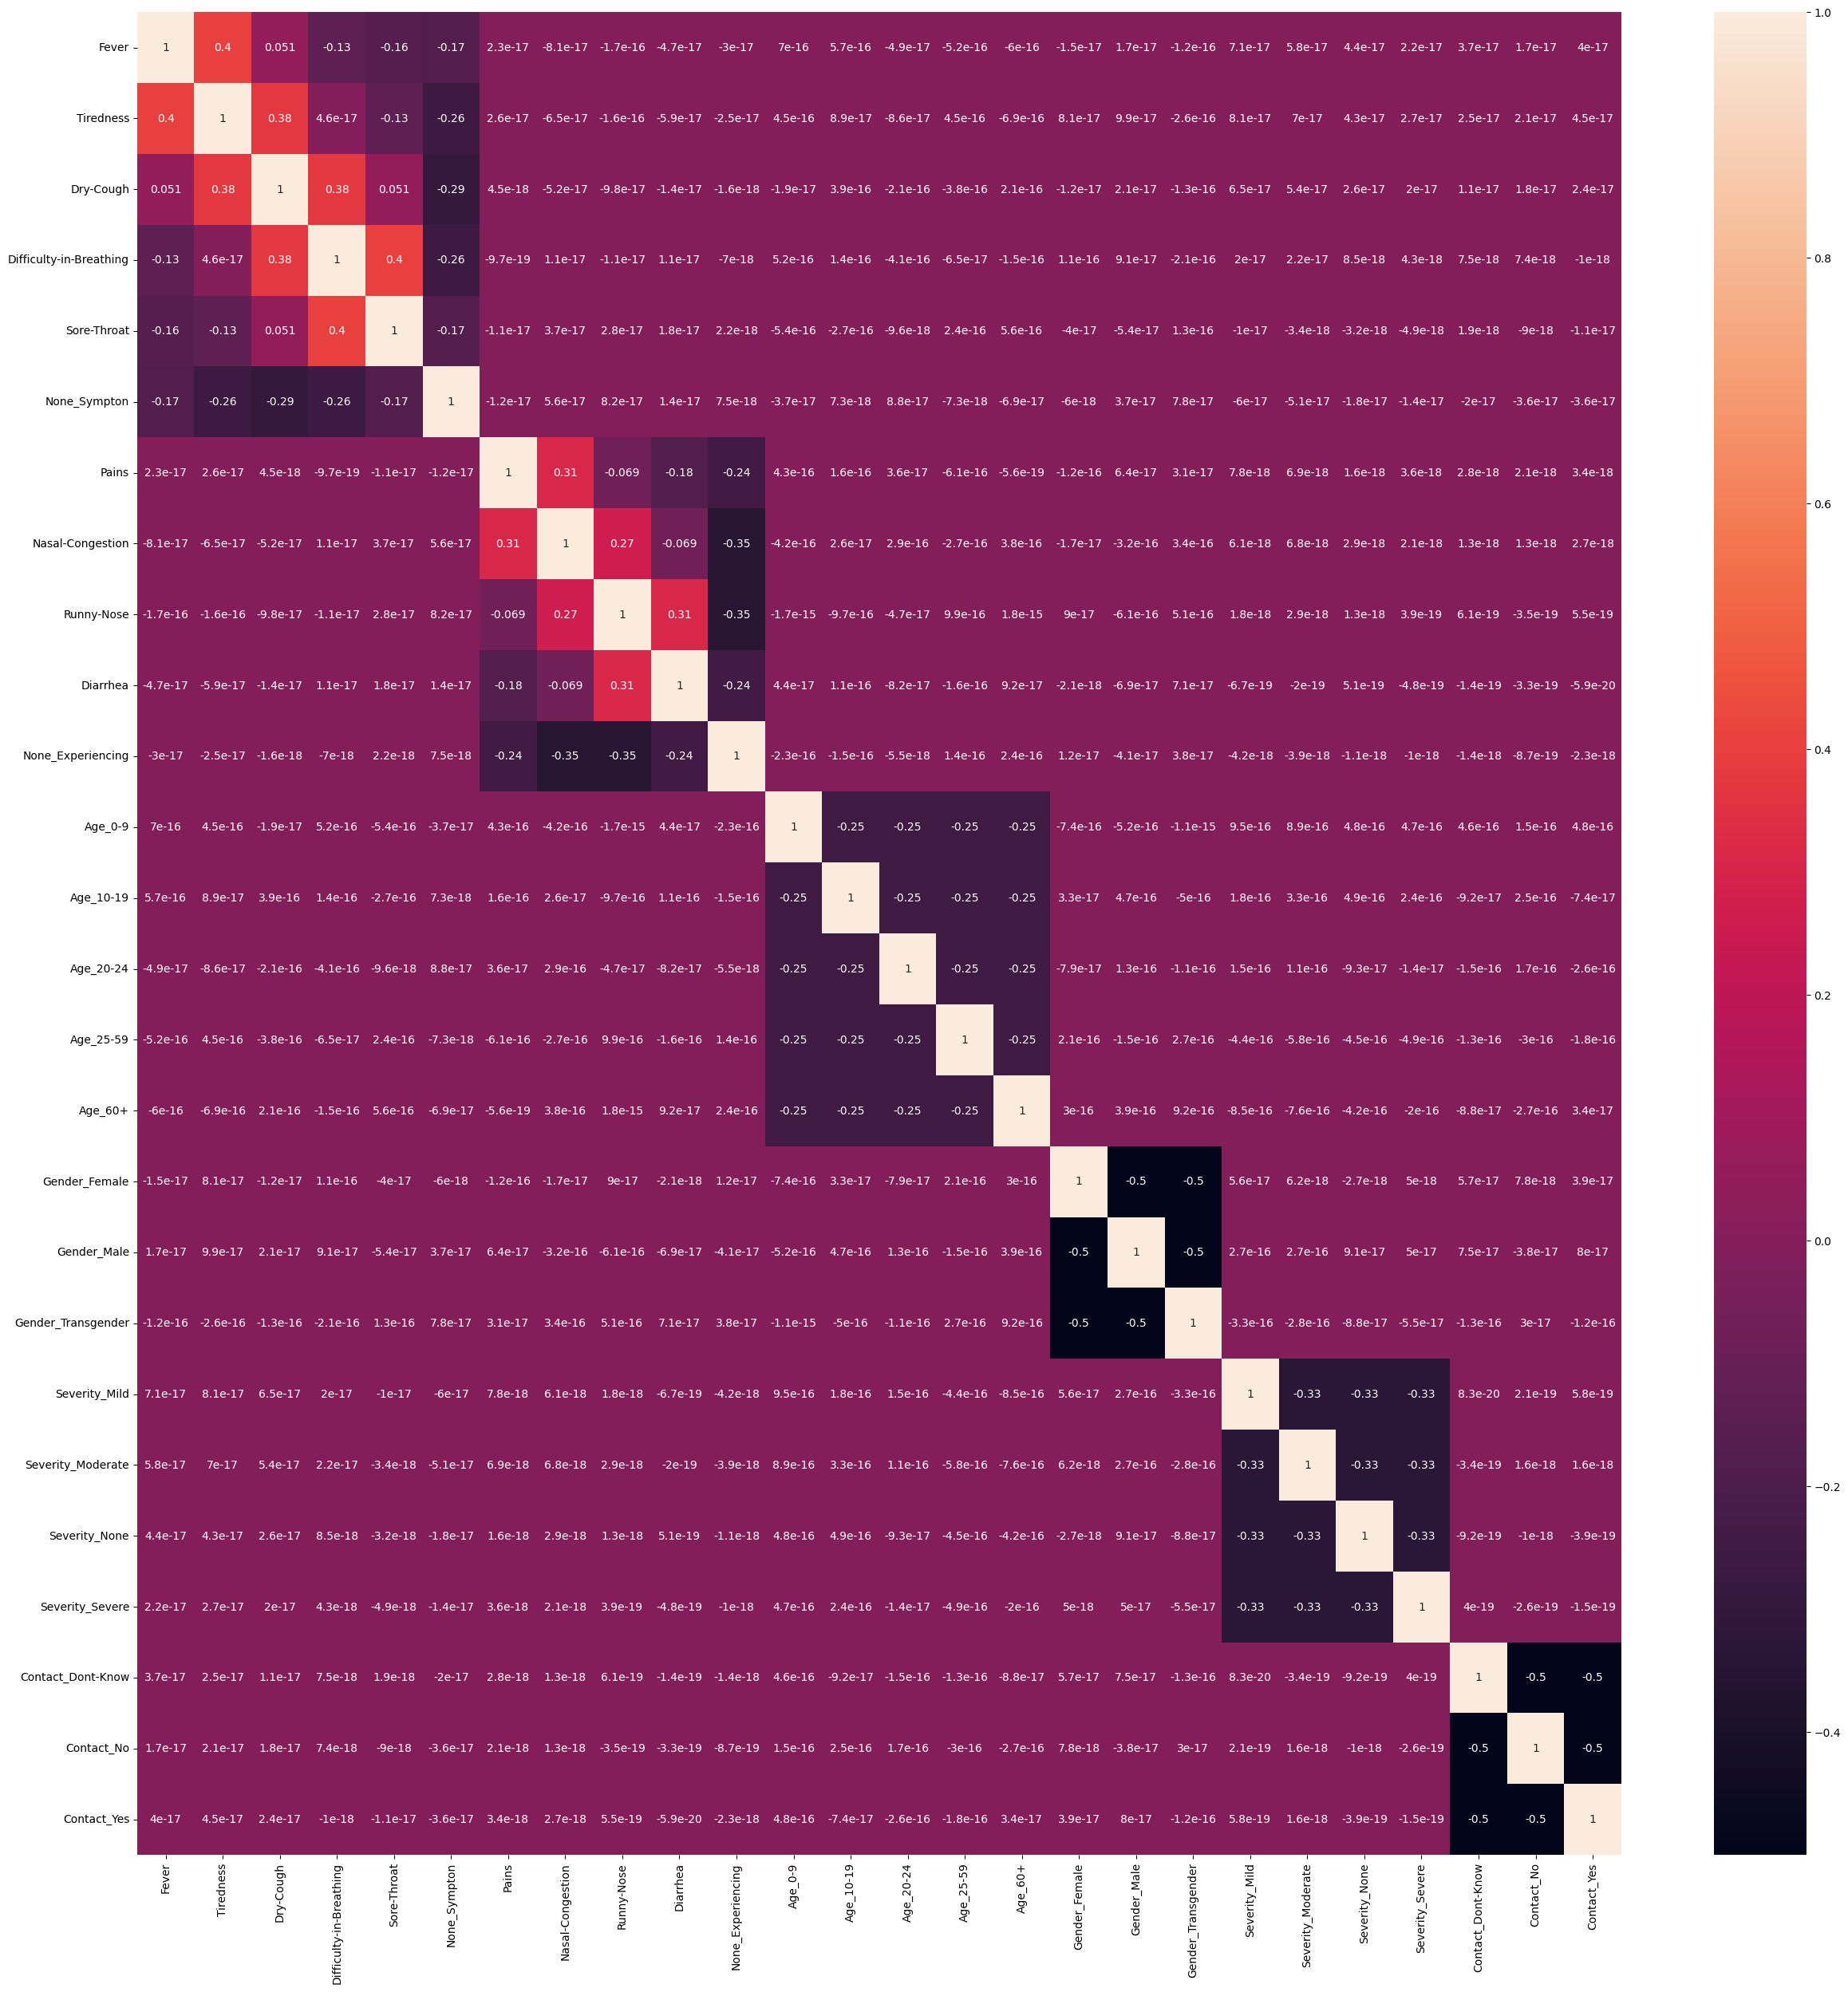

In [10]:
#To plot a correlation matrix between features.
f,ax= plt.subplots(figsize=(30,30))
sns.heatmap(corona_pd.corr(),annot=True)

# Elbow Method

In [11]:
#To scale the values along columns.
scaler= StandardScaler()
corona_pd_scaled=scaler.fit_transform(corona_pd)

In [12]:
#To get the Within Cluster Sum of Squares(WCSS) for each cluster count to find the optimal K value(i.e cluster count).
scores=[]
for i in range(1,20):
    corona_means=KMeans(n_clusters=i)
    corona_means.fit(corona_pd_scaled)
    scores.append(corona_means.inertia_)

C:\Users\Vinith MH\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Vinith MH\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Vinith MH\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Vinith MH\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to su

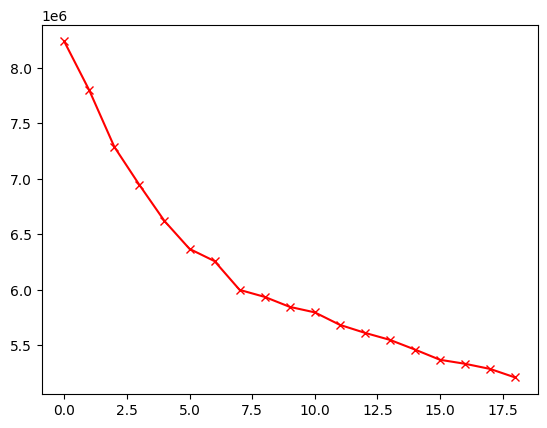

In [13]:
#Plotting the values obtained to get the optimal K-value.
plt.plot(scores,"-rx")

# K-MEANS Implementation

In [14]:
#Applying K-means algorithm with the obtained K value.
corona_means=KMeans(n_clusters=7)
corona_means.fit(corona_pd_scaled)

C:\Users\Vinith MH\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7)

In [15]:
#Returns an array with cluster labels to which it belongs.
labels=corona_means.labels_

In [16]:
#Creating a Dataframe with cluster centres(The example which is taken as center for each cluster)-If you are not familiar ,learn about k-means through the link given at last.
corona_pd_m=pd.DataFrame(corona_means.cluster_centers_,columns=corona_pd.columns)
corona_pd_m

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
0,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,3.226200e-16,-2.513202e-16,4.071322e-16,1.146686e-16,...,-4.909061e-15,7.236896e-15,8.647270e-15,-9.181769e-20,-1.565340e-20,-6.313552e-17,-2.312965e-20,7.401487e-17,7.401487e-17,7.401487e-17
1,-0.674200,-1.000000,-1.133893,-1.000000,-0.674200,3.872983,4.167647e-16,-3.073622e-16,4.191989e-16,6.038730e-17,...,1.428406e-15,-4.897878e-18,-1.249982e-17,-2.600333e-19,-4.555839e-20,-6.448125e-17,-7.920152e-20,7.401487e-17,7.401487e-17,7.401487e-17
2,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,4.304873e-16,-3.222548e-16,4.302189e-16,5.373718e-17,...,-4.719583e-15,7.874710e-15,7.869022e-15,-9.181769e-20,-3.060590e-20,-7.395366e-17,-3.060590e-20,7.401487e-17,7.401487e-17,7.401487e-17
3,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,4.201178e-16,-2.275756e-16,4.145786e-16,5.378390e-17,...,-4.719822e-15,8.256896e-15,8.207606e-15,-7.686519e-20,-2.312965e-20,-7.393870e-17,-2.686777e-20,7.401487e-17,7.401487e-17,7.401487e-17
4,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,3.814170e-16,-1.962053e-16,4.302339e-16,7.815087e-17,...,3.535534e-01,-7.071068e-01,3.535534e-01,-1.254608e-19,-2.312965e-20,-6.438032e-17,-2.312965e-20,7.401487e-17,7.401487e-17,7.401487e-17
5,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,3.752528e-16,-3.129245e-16,4.071621e-16,9.542474e-17,...,-2.032664e-14,8.262757e-15,5.703661e-15,-7.686519e-20,-2.312965e-20,-7.393870e-17,-2.686777e-20,7.401487e-17,7.401487e-17,7.401487e-17
6,0.044947,0.066667,0.075593,0.066667,0.044947,-0.258199,4.301883e-16,-3.208194e-16,4.293816e-16,5.355775e-17,...,-7.071068e-01,1.414214e+00,-7.071068e-01,-2.712477e-19,-9.041589e-20,-7.383404e-17,-9.041589e-20,7.401487e-17,7.401487e-17,7.401487e-17


In [17]:
#Concatenating the cluster labels.
corona_cluster=pd.concat([corona_pd,pd.DataFrame({"Cluster":labels})],axis=1)
corona_cluster.sample(5)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Cluster
8517,1,1,1,1,1,0,0,1,1,0,...,0,0,0,0,1,0,0,0,1,5
30374,0,1,1,1,0,0,1,1,1,0,...,0,1,1,0,0,0,1,0,0,2
315837,0,1,0,0,0,0,0,0,1,1,...,0,1,0,0,1,0,0,0,1,2
219707,1,1,1,1,1,0,0,1,1,1,...,0,1,0,0,1,0,1,0,0,2
26558,0,0,1,1,1,0,1,1,0,0,...,1,0,1,0,0,0,1,0,0,2


# Principal Component Analysis (PCA)

In [18]:
#Implementing pca with 3 components i.e 3d plot
corona_pca=PCA(n_components=3)
principal_comp=corona_pca.fit_transform(corona_pd_scaled)

In [19]:
principal_comp=pd.DataFrame(principal_comp,columns=['pca1','pca2','pca3'])
principal_comp.head()

,pca1,pca2,pca3
0,-2.059952,-1.773715,-0.018643
1,-2.027090,-1.762231,-0.002101
2,-2.004891,-1.676623,-0.026504
3,-2.078970,-1.781894,-0.018068
4,-2.046108,-1.770411,-0.001526


In [20]:
principal_comp=pd.concat([principal_comp,pd.DataFrame({"Cluster":labels})],axis=1)
principal_comp.sample(5)

,pca1,pca2,pca3,Cluster
81502,-0.733628,-1.165482,2.069354,0
127132,0.362634,-1.275613,-2.061030,3
170809,1.193463,-1.695534,1.127153,5
205572,-1.667146,-1.266793,1.125798,0
121370,-0.217539,-0.624774,-0.914371,2


C:\Users\Vinith MH\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


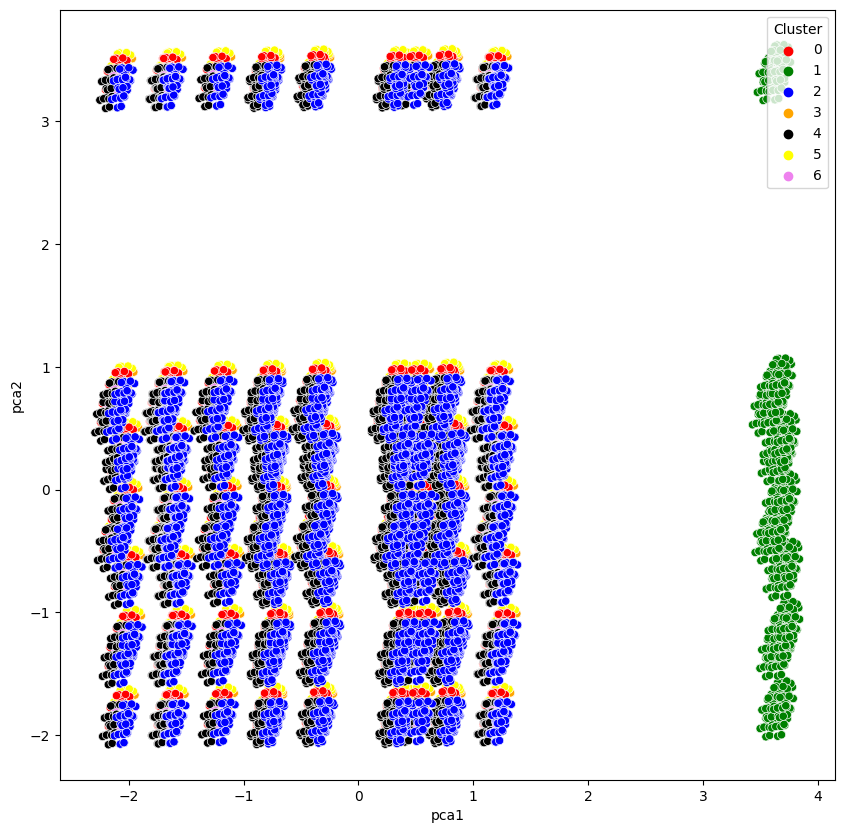

In [21]:
#Plotting the 2d-plot.
plt.figure(figsize=(10,10))
ax=sns.scatterplot(x='pca1',y='pca2',hue="Cluster",data=principal_comp ,palette=['red','green','blue','orange','black','yellow','violet'])
plt.show()

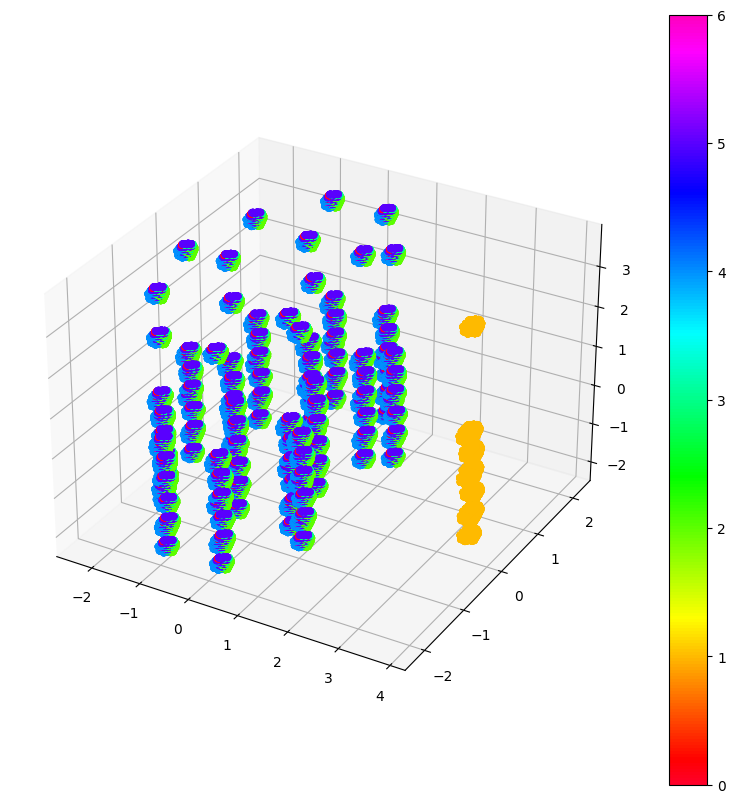

In [22]:
#Plotting the 3d-plot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
sc=ax.scatter(xs=principal_comp['pca1'],ys=principal_comp['pca3'],zs=principal_comp['pca2'],c=principal_comp['Cluster'],marker='o',cmap="gist_rainbow")
plt.colorbar(sc)
plt.show()